In [1]:
%matplotlib inline
#Calculate
import math
import numpy as np
from numpy import unique
import pandas as pd
import time
#Visualize
import matplotlib.pyplot as plt
from matplotlib import pyplot
#Preprocess
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
#Model
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.linear_model import LinearRegression
#Evalute
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, make_scorer
#Package
import joblib


In [30]:
#pip install sklearn.ensemble==1.2.2

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement sklearn.ensemble==1.2.2 (from versions: none)
ERROR: No matching distribution found for sklearn.ensemble==1.2.2


# DATA

In [2]:
dataframe = pd.read_csv('D:/dataset/Flat_Preprocessed.csv')
datatest = pd.read_csv('D:/dataset/Flat_Test_Preprocessed.csv')

In [3]:
dataframe

,flat_type,storey_range,floor_area_sqm,lease_commence_date,real_price,latitude,longitude,Cluster
0,3.0,7.0,60.0,1986.0,257.0,1.369208,103.850399,1.0
1,3.0,1.0,68.0,1981.0,277.0,1.369208,103.850399,1.0
2,3.0,1.0,69.0,1980.0,288.0,1.369208,103.850399,1.0
3,3.0,1.0,68.0,1979.0,293.0,1.369208,103.850399,1.0
4,3.0,7.0,68.0,1980.0,293.0,1.369208,103.850399,1.0
...,...,...,...,...,...,...,...,...
175796,6.0,4.0,146.0,1988.0,673.0,1.429384,103.835028,2.0
175797,6.0,7.0,142.0,1988.0,701.0,1.429384,103.835028,2.0
175798,6.0,4.0,163.0,1992.0,892.0,1.429384,103.835028,2.0
175799,7.0,10.0,164.0,1987.0,967.0,1.429384,103.835028,2.0


# DATAFRAME TRAIN-TEST SPLIT

In [4]:
X = dataframe.drop(['real_price'],axis =1).values
y = dataframe['real_price'].values
s_scaler = StandardScaler()
X = s_scaler.fit_transform(X)

#splitting Train and Test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [5]:
def train_and_time(model,X_train=X_train,y_train=y_train):
    t0=time.time()
    model.fit(X_train, y_train)
    rf_time_train=time.time()-t0
    return model, rf_time_train

def predict_and_time(model,X_test=X_test):
    t0=time.time()
    predicted = model.predict(X_test)
    rf_time_predict=time.time()-t0
    return predicted, rf_time_predict 

In [6]:
def cal_error(y_test,predicted):   
    print('MSE:', metrics.mean_squared_error(y_test, predicted))  
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predicted)))
    print('MAE:', np.sqrt(metrics.mean_absolute_error(y_test, predicted)))
    print('R2_Score:',r2_score(y_test, predicted))

# RANDOM FOREST Algorithm

In [7]:
rf = RandomForestRegressor(n_estimators=50, random_state=101)
rf, rf_train_time = train_and_time(rf)
rfpredicted, rf_predict_time = predict_and_time(rf)
print("Training time:", rf_train_time)
print("Predict time:", rf_predict_time)


Training time: 10.885517120361328
Predict time: 0.44539713859558105


In [8]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': rfpredicted})
df

,Actual,Predicted
0,1050.0,907.240000
1,487.0,446.176350
2,326.0,364.583638
3,549.0,574.748095
4,519.0,527.308585
...,...,...
35156,609.0,529.882773
35157,326.0,314.061223
35158,576.0,582.543706
35159,574.0,511.267375


In [9]:
cal_error(y_test,rfpredicted)

MSE: 1072.4943788437745
RMSE: 32.74895996583364
MAE: 4.947598120392736
R2_Score: 0.9553338008952235


# XGBOOST Algorithm

In [10]:
xgb = XGBRegressor(learning_rate=0.3,n_estimators = 150)
xgb, xgb_train_time = train_and_time(xgb)
xgbpredicted, xgb_predict_time = predict_and_time(xgb)
print("Training time:", xgb_train_time)
print("Predict time:", xgb_predict_time)

Training time: 5.489856243133545
Predict time: 0.03124213218688965


[0]	validation_0-rmse:342.98783	validation_1-rmse:343.10109
[1]	validation_0-rmse:243.12281	validation_1-rmse:243.14693
[2]	validation_0-rmse:174.12604	validation_1-rmse:174.03657
[3]	validation_0-rmse:126.64642	validation_1-rmse:126.40061
[4]	validation_0-rmse:95.12560	validation_1-rmse:94.80822


D:\anaconda\lib\site-packages\xgboost\sklearn.py:835: UserWarning: `eval_metric` in `fit` method is deprecated for better compatibility with scikit-learn, use `eval_metric` in constructor or`set_params` instead.
  warnings.warn(


[5]	validation_0-rmse:74.42018	validation_1-rmse:74.03940
[6]	validation_0-rmse:61.30033	validation_1-rmse:60.93549
[7]	validation_0-rmse:52.91862	validation_1-rmse:52.55866
[8]	validation_0-rmse:47.91313	validation_1-rmse:47.62019
[9]	validation_0-rmse:45.07572	validation_1-rmse:44.87498
[10]	validation_0-rmse:43.16792	validation_1-rmse:42.96877
[11]	validation_0-rmse:42.13152	validation_1-rmse:41.97075
[12]	validation_0-rmse:41.39777	validation_1-rmse:41.24912
[13]	validation_0-rmse:40.94286	validation_1-rmse:40.79563
[14]	validation_0-rmse:40.55927	validation_1-rmse:40.42009
[15]	validation_0-rmse:39.89192	validation_1-rmse:39.74804
[16]	validation_0-rmse:39.60748	validation_1-rmse:39.48342
[17]	validation_0-rmse:39.44428	validation_1-rmse:39.33296
[18]	validation_0-rmse:39.15928	validation_1-rmse:39.08095
[19]	validation_0-rmse:38.95702	validation_1-rmse:38.90330
[20]	validation_0-rmse:38.70680	validation_1-rmse:38.66620
[21]	validation_0-rmse:38.55716	validation_1-rmse:38.52692
[2

[144]	validation_0-rmse:32.16919	validation_1-rmse:32.99114
[145]	validation_0-rmse:32.15436	validation_1-rmse:32.97401
[146]	validation_0-rmse:32.13076	validation_1-rmse:32.95710
[147]	validation_0-rmse:32.09932	validation_1-rmse:32.93583
[148]	validation_0-rmse:32.06968	validation_1-rmse:32.90396
[149]	validation_0-rmse:32.06151	validation_1-rmse:32.89907


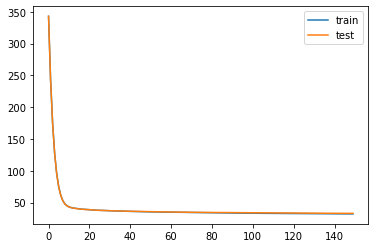

In [11]:
evalset = [(X_train, y_train), (X_test, y_test)]
xgb.fit(X_train, y_train, eval_metric='rmse', eval_set=evalset)
yhat = xgb.predict(X_test)
results = xgb.evals_result() 
pyplot.plot(results['validation_0']['rmse'], label='train') 
pyplot.plot(results['validation_1']['rmse'], label='test') 
pyplot.legend() 
pyplot.show()

In [12]:
cal_error(y_test,xgbpredicted)

MSE: 1082.3489072977188
RMSE: 32.899071526377746
MAE: 5.007484981754416
R2_Score: 0.9549233891124763


# SGD Algorithm

In [14]:
SGD = SGDRegressor()
SGD, sgd_train_time = train_and_time(SGD)
sgdp, sgd_predict_time = predict_and_time(SGD)
print("Training time:", sgd_train_time)
print("Predict time:", sgd_predict_time)

Training time: 1.5221936702728271
Predict time: 0.008811712265014648


In [15]:
cal_error(y_test,sgdp)

MSE: 9611.848324544211
RMSE: 98.04003429489512
MAE: 8.509367783795383
R2_Score: 0.5996951224193386


# Linear Regressor

In [21]:
lr = SGDRegressor()
lr, sgd_train_time = train_and_time(lr)
lrp, sgd_predict_time = predict_and_time(lr)
print("Training time:", sgd_train_time)
print("Predict time:", sgd_predict_time)

Training time: 0.3307619094848633
Predict time: 0.0


In [22]:
cal_error(y_test,lrp)

MSE: 9606.773699113539
RMSE: 98.01415050447328
MAE: 8.531890983018837
R2_Score: 0.5999064654662951


# Decision Tree

In [23]:
dt = DecisionTreeRegressor()
dt, sgd_train_time = train_and_time(dt)
dtp, sgd_predict_time = predict_and_time(dt)
print("Training time:", sgd_train_time)
print("Predict time:", sgd_predict_time)

Training time: 0.28780484199523926
Predict time: 0.0


In [24]:
cal_error(y_test,dtp)

MSE: 1181.5811310568822
RMSE: 34.37413462266188
MAE: 5.026848946016043
R2_Score: 0.9507906623108544


# TEST WITH DATA FROM ANOTHER WEB

In [25]:
#Transform
Xt = datatest.drop(['real_price'],axis =1).values
yt = datatest['real_price'].values
Xt = s_scaler.fit_transform(Xt)

In [26]:
#Predict
rfp, rf_time = predict_and_time(rf,Xt)
xgbp, xgb_time = predict_and_time(lr,Xt)
dtp, dt_time = predict_and_time(dt,Xt)
sgdp, sgd_time = predict_and_time(SGD,Xt)
lrp, lr_time = predict_and_time(lr,Xt)

In [27]:
#Show Result
df = pd.DataFrame({'Actual': yt, 'RF Predicted': rfp,'XGB Predicted':xgbp,
                   'Decision tree Predicted':dtp,'SGD Predicted':sgdp,'linear Predicted':lrp,
                   'different 1':(rfp-yt),'different 2':(xgbp-yt),'different 3':(dtp-yt),
                   'different 4':(sgdp-yt),'different 5':(lrp-yt)})
df = df.astype('int')
df

,Actual,RF Predicted,XGB Predicted,Decision tree Predicted,SGD Predicted,linear Predicted,different 1,different 2,different 3,different 4,different 5
0,315,302,270,307,270,270,-12,-44,-8,-44,-44
1,303,302,262,307,262,262,0,-40,4,-40,-40
2,322,302,262,307,262,262,-19,-59,-15,-59,-59
3,352,302,279,307,278,279,-49,-72,-45,-73,-72
4,310,302,262,307,262,262,-7,-47,-3,-47,-47
5,806,548,603,548,597,603,-257,-202,-257,-208,-202
6,829,543,538,542,533,538,-285,-290,-286,-295,-290
7,797,546,677,601,669,677,-250,-119,-196,-127,-119
8,816,548,587,548,581,587,-267,-228,-267,-234,-228
9,821,546,668,601,661,668,-274,-152,-220,-159,-152


# TEST error

In [28]:
Model_predict = [rfp,xgbp,dtp,sgdp,lrp]
MSE = []
RMSE=[]
MAE =[]
R2_Score =[]
model_time=[rf_time,xgb_time,dt_time,sgd_time,lr_time]

In [29]:
for i in Model_predict:
    MSE.append(metrics.mean_squared_error(yt, i))
    RMSE.append(np.sqrt(metrics.mean_squared_error(yt, i)))
    MAE.append(np.sqrt(metrics.mean_absolute_error(yt, i)))
    R2_Score.append(r2_score(yt, i))

In [30]:
Model_name = ['rfp','xgbp','dtp','sgdp','lrp']
Error = pd.DataFrame({'MSE':MSE,'RMSE':RMSE,'MAE':MAE,'R2_Score':R2_Score,'model_time':model_time},index=Model_name)
Error = Error.T
Error

,rfp,xgbp,dtp,sgdp,lrp
MSE,12807.316285,8670.772233,23005.552065,8714.639830,8670.772233
RMSE,113.169414,93.116981,151.675812,93.352235,93.116981
MAE,8.824685,8.368743,10.048463,8.349791,8.368743
R2_Score,0.406141,0.597947,-0.066739,0.595913,0.597947
model_time,0.004962,0.001026,0.000000,0.000000,0.000000


In [31]:
rf.feature_importances_

array([0.05608052, 0.05498051, 0.06660093, 0.06486924, 0.02709558,
       0.0290169 , 0.70135632])

<BarContainer object of 7 artists>

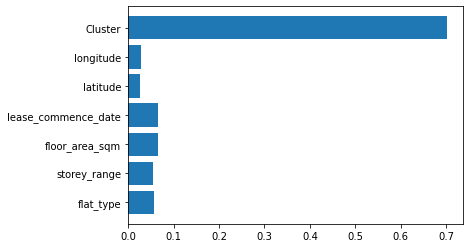

In [32]:
#Show feature importance in Random forest
plt.barh(dataframe.columns.drop('real_price'), rf.feature_importances_)

In [33]:
#Save Model
path = 'D:/Flask_Regressor/'
import pickle
def dump(model,name,path=path):
    pickle.dump(model,open(path+name+'.pkl','wb'))

In [34]:
dump(rf,'rf')
dump(xgb,'xgb')
dump(SGD,'SGD')
dump(lr,'lr')

# Predict

In [35]:
list1=[[1,1,1,1,1,1,1]]
lr.predict(list1)

array([536.98520151])